In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import seaborn

from scipy.stats import kendalltau, pearsonr
from numpy import linspace
from math import sin, cos, atan, ceil, pi
from statistics import stdev

from Bio.SeqIO import parse
import pandas
from itertools import combinations
import dendropy
from SuchTree import SuchTree, SuchLinkedTrees

In [19]:
T1 = SuchTree( 'hosttree.nwk' )
T2 = SuchTree( 'symtree.nwk' )
links = pandas.read_csv( 'links.csv', index_col=0 )
links.index = [ str(x) for x in links.index ]

links.shape, len(T1.leafs), len(T2.leafs)

TT = SuchLinkedTrees( T1, T2, links.T )

/tmp/ipykernel_258518/2687703911.py:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  TT = SuchLinkedTrees( T1, T2, links.T )


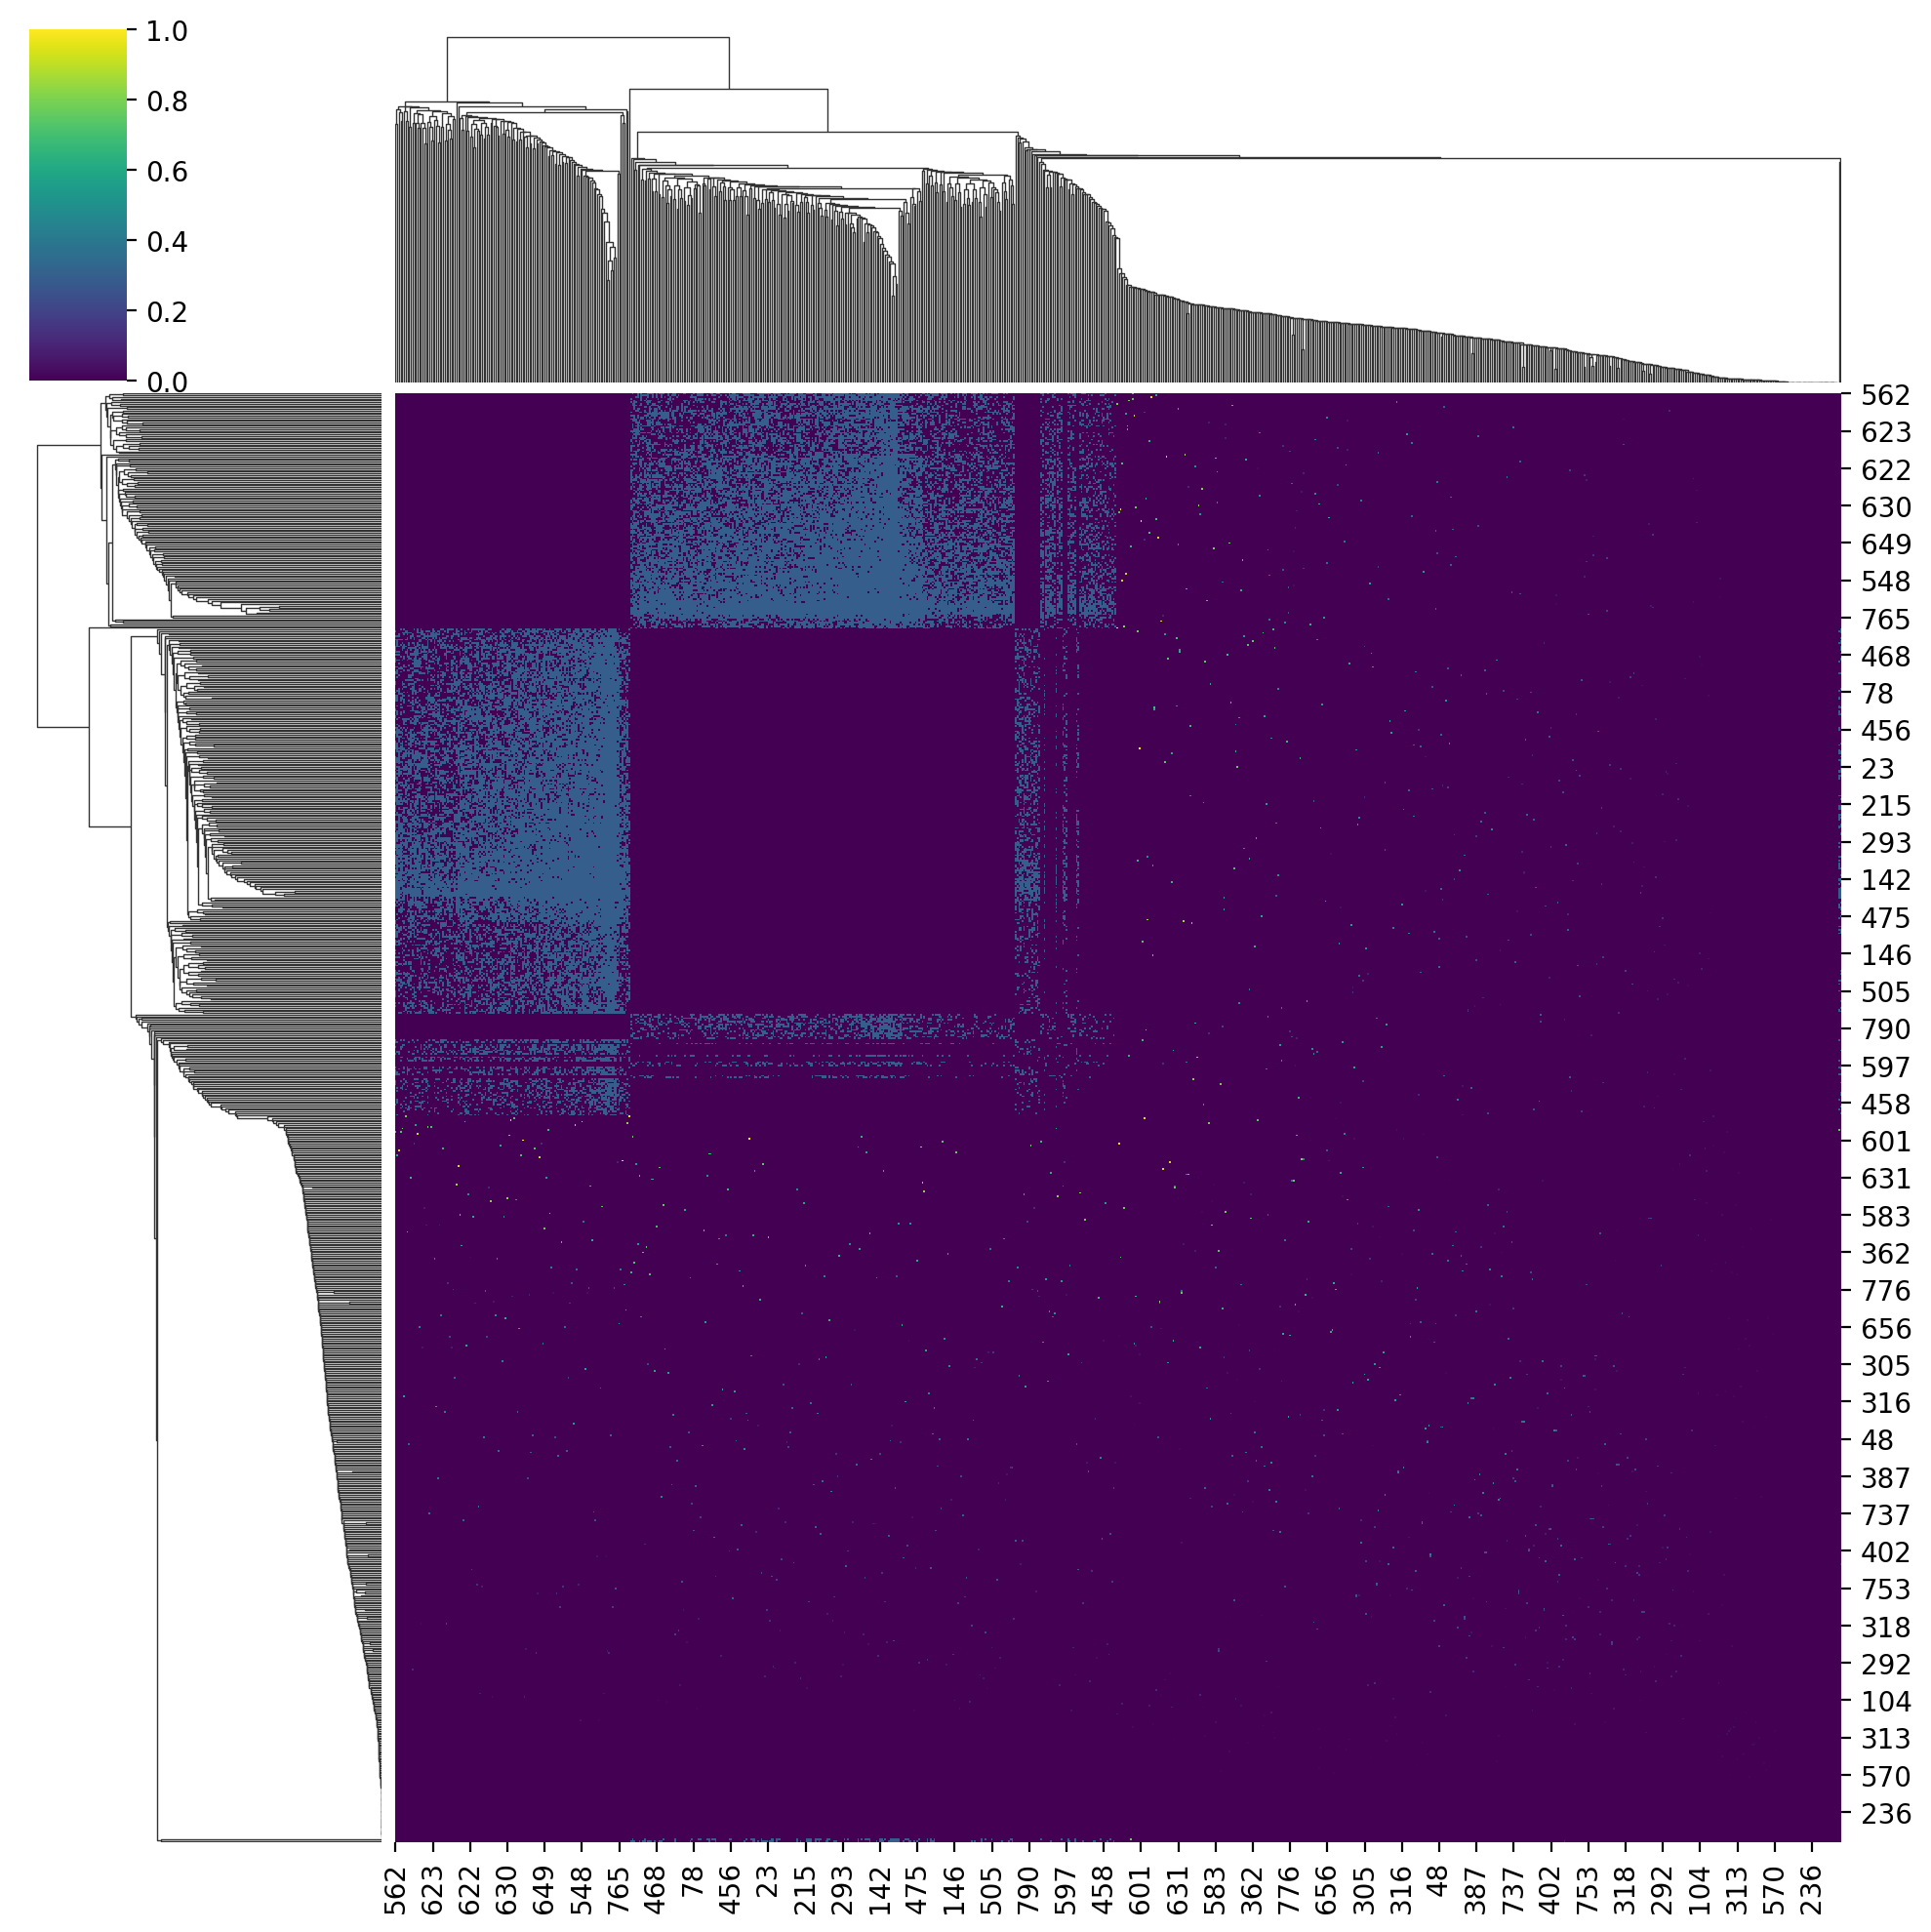

In [23]:
fig = seaborn.clustermap( TT.adjacency(), cmap='viridis' )

fig.savefig( 'SuchTree_meets_Symbulation.png' )

In [27]:
%time result = TT.sample_linked_distances( sigma=0.001, buckets=64, n=4096 )

CPU times: user 59.2 ms, sys: 0 ns, total: 59.2 ms
Wall time: 68.3 ms


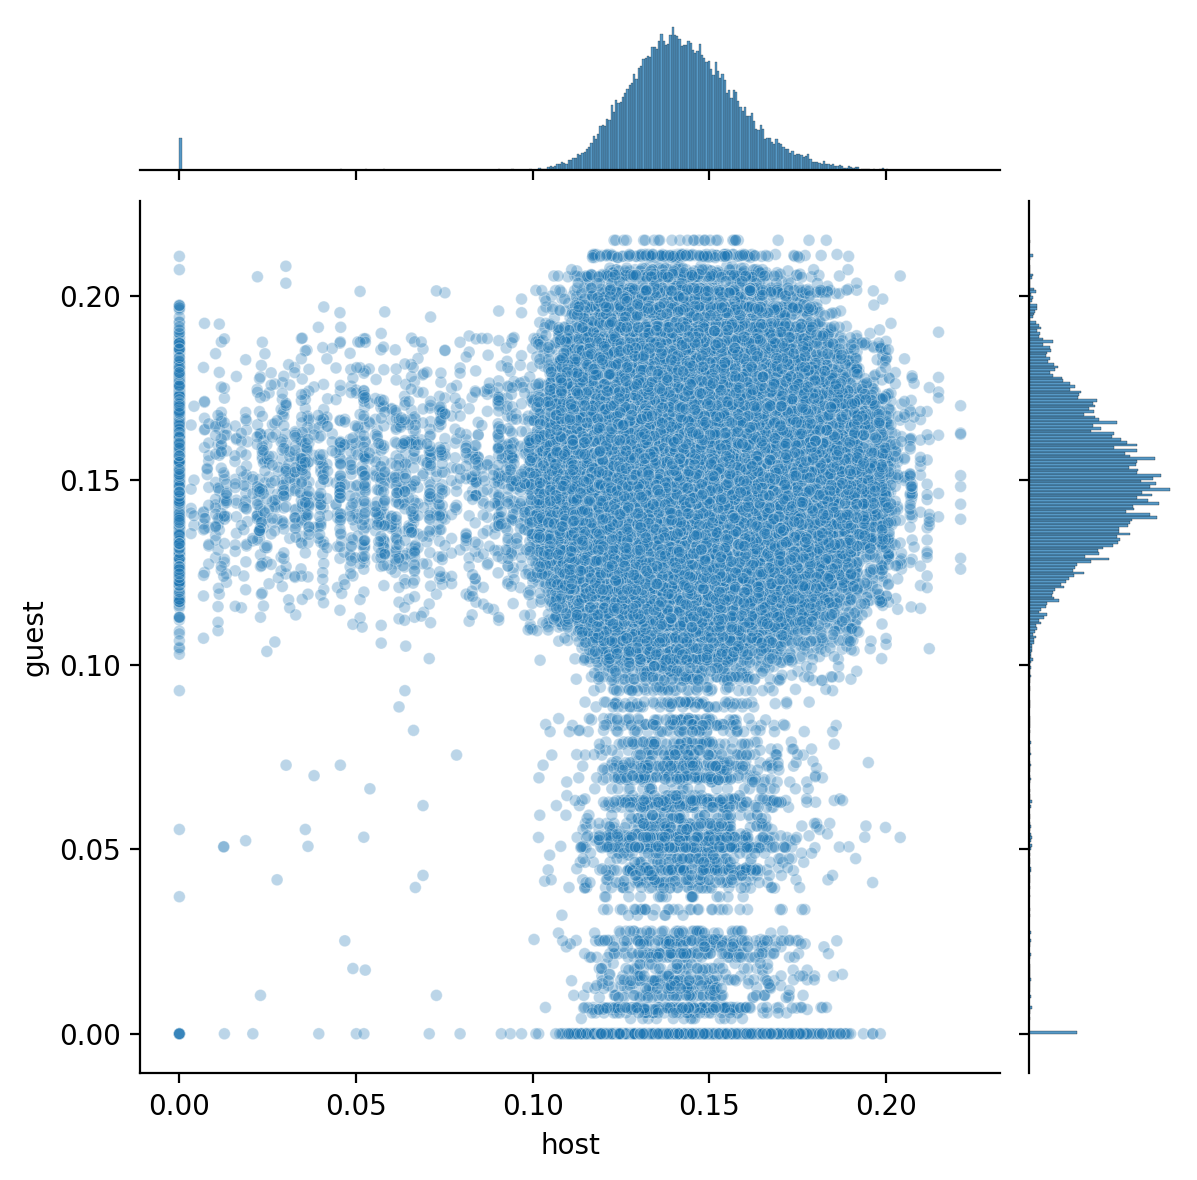

In [36]:
df = pandas.DataFrame( { 'host'  : result['TreeA'], 
                         'guest' : result['TreeB'] } )

fig = seaborn.jointplot( x='host', y='guest',
                         data=df, alpha=0.3, size=8, legend=False )
 
fig.savefig( 'SuchTree_meets_Symbulation_distances.png' )